In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
# % matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils


Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

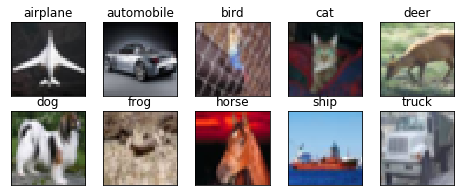

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [5]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [6]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [7]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [9]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """
C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  if __name__ == '__main__':
C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Ker

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 12s 32ms/step - loss: 1.8536 - accuracy: 0.2839 - val_loss: 1.4168 - val_accuracy: 0.4762
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 1.3433 - accuracy: 0.5111 - val_loss: 1.2041 - val_accuracy: 0.5743
Epoch 3/50
390/390 [==============================] - 9s 23ms/step - loss: 1.1183 - accuracy: 0.6019 - val_loss: 0.9509 - val_accuracy: 0.6574
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9694 - accuracy: 0.6602 - val_loss: 0.8606 - val_accuracy: 0.6993
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8716 - accuracy: 0.6980 - val_loss: 0.7998 - val_accuracy: 0.7254
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8012 - accuracy: 0.7243 - val_loss: 0.7333 - val_accuracy: 0.7488
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7467 - accuracy: 0.7437 - val_loss: 0.6943 - val_accuracy: 0.760

KeyError: 'acc'

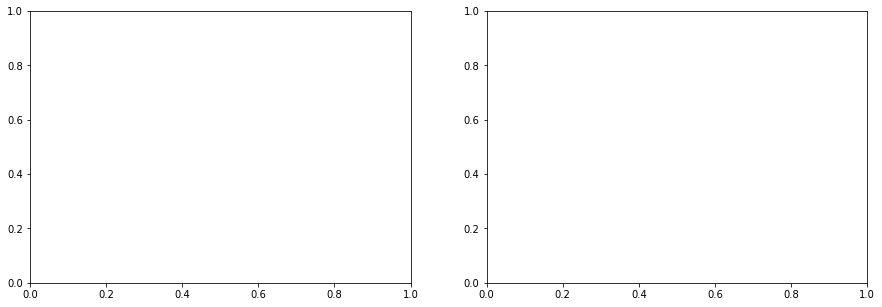

In [11]:



# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))


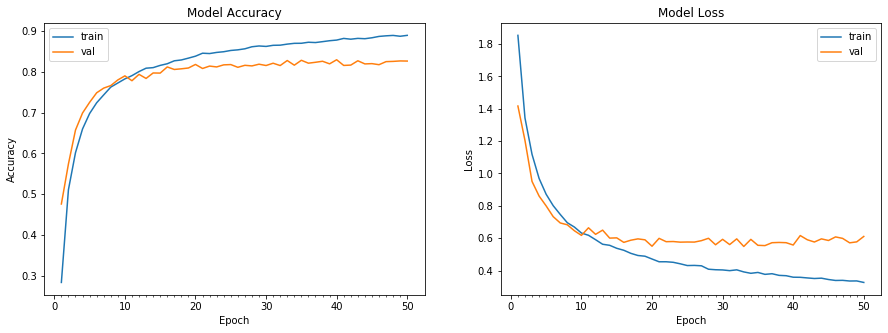

Accuracy on test data is: 82.66


In [13]:
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [58]:
# Define the model

# (Output size, receptive field) mentioned in tuple form after adding each layer as comment.

model_2 = Sequential()
model_2.add(SeparableConv2D(48, 3, 3, activation='relu', input_shape=(32, 32, 3))) # (30, 3)
model_2.add(BatchNormalization())
model.add(Dropout(0.1))

model_2.add(SeparableConv2D(48, 3, 3, activation='relu')) # (28, 5)
model_2.add(BatchNormalization())
model.add(Dropout(0.1))


model_2.add(MaxPooling2D(pool_size=(2, 2))) # (14, 6)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(96, 3, 3, activation='relu')) # (12, 9)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(96, 3, 3, activation='relu')) # (10, 13)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))

model_2.add(MaxPooling2D(pool_size=(2, 2))) # (5, 15)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(192, 3, 3, activation='relu')) # (3, 19)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(192, 3, 3, activation='relu')) # (1, 27)
model_2.add(BatchNormalization())
model_2.add(Dropout(0.1))


model_2.add(SeparableConv2D(num_classes, 1, 1, activation='relu')) # (10, 27)
model_2.add(BatchNormalization())



model_2.add(Flatten())
model_2.add(Activation('softmax')) #(10, 27)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=2, min_lr=0.1e-6)

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), activation="relu", input_shape=(32, 32, 3...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), activation="relu")`
  import sys
C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:32: UserWarning:

In [59]:
model_2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_100 (Separa (None, 30, 30, 48)        219       
_________________________________________________________________
batch_normalization_182 (Bat (None, 30, 30, 48)        192       
_________________________________________________________________
separable_conv2d_101 (Separa (None, 28, 28, 48)        2784      
_________________________________________________________________
batch_normalization_183 (Bat (None, 28, 28, 48)        192       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 14, 48)        0         
_________________________________________________________________
batch_normalization_184 (Bat (None, 14, 14, 48)        192       
_________________________________________________________________
dropout_60 (Dropout)         (None, 14, 14, 48)      

In [28]:
# train the model
start = time.time()
# Train the model
model_2_info = model_2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50,
                                     callbacks=[lr_reducer],
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model_2 took %0.2f seconds to train"%(end - start))

NameError: name 'model_2' is not defined

In [27]:
# plot model history
plot_model_history(model_2_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

NameError: name 'model_2_info' is not defined